<a href="https://colab.research.google.com/github/davicsilva/demo-notebooks/blob/main/Demo_Matplotlib_GanttChart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2023 - Apr, 15th - Gantt Chat with MatPlotLib
### This is a simple notebook[1] that show how-to "plot" a Gantt Chat graph using only MatPlotLib 
*(source: https://towardsdatascience.com/3-unique-charts-created-with-matplotlib-you-probably-havent-seen-before-421ab8cdd36f)*

In [11]:
# libs
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import datestr2num, DateFormatter, DayLocator
from matplotlib.ticker import AutoMinorLocator
from matplotlib.patches import Patch

In [12]:
# Dummy data: taks, start and end dates
tasks = ['Task A', 'Task B', 'Task C', 'Task D', 'Task E', 'Task F', 'Task G', 'Task H', 'Task I', 'Task J']
start_dates = ['2023-02-25', '2023-03-10', '2023-03-13', '2023-03-23', '2023-04-01', '2023-04-05', '2023-04-12', '2023-04-20', '2023-04-24', '2023-05-02']
end_dates = ['2023-03-03', '2023-03-17', '2023-03-22', '2023-03-30', '2023-04-07', '2023-04-18', '2023-04-23', '2023-04-25', '2023-05-03', '2023-05-07']

# Setup the dates and calculate durations
start_dates = [datestr2num(d) for d in start_dates]
end_dates = [datestr2num(d) for d in end_dates]

In [13]:
durations = [(end - start) for start, end in zip(start_dates, end_dates)]

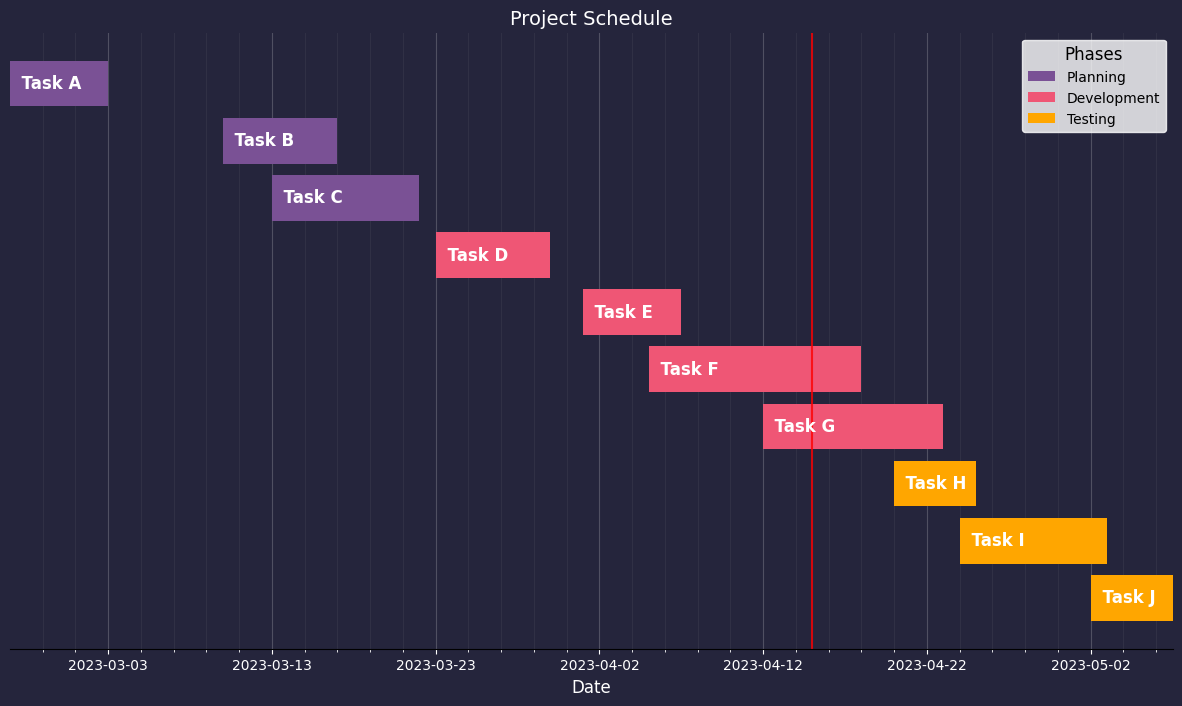

In [17]:
fig, ax = plt.subplots(figsize=(15, 8), facecolor='#25253c')

ax.set_facecolor('#25253c')

# Create colours for each task based on categories
colors = ['#7a5195', '#ef5675', '#ffa600'] 
task_colors = [colors[0]] * 3 + [colors[1]] * 4 + [colors[2]] * 3

# Display the bars
ax.barh(y=tasks, width=durations, left=start_dates, 
height=0.8, color=task_colors)

ax.invert_yaxis()

# Setup the x axis labels
ax.set_xlim(start_dates[0], end_dates[-1])

date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(DayLocator(interval=10))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(axis='x', which='minor', length=2, color='white', labelsize=6)

ax.get_yaxis().set_visible(False)

# Control the colour of the grid for major and minor lines
ax.grid(True, axis='x', linestyle='-', color='#FFFFFF', alpha=0.2, which='major')
ax.grid(True, axis='x', linestyle='-', color='#FFFFFF', alpha=0.05, which='minor')
ax.set_axisbelow(True)

# Add labels for each task. For padding, we can use an f-string and add some extra space
for i, task in enumerate(tasks):
    ax.text(start_dates[i], i, f'  {task}', ha='left', va='center', color='white', fontsize=12, fontweight='bold')

# Add the current date line
today = datetime.datetime.now().strftime("%Y-%m-%d")
today_num = datestr2num(today)
ax.axvline(today_num, color='red', alpha=0.8)

# Style ticks, labels and colours
ax.tick_params(axis='both', colors='white')

ax.set_xlabel('Date', color='white', fontsize=12)
ax.set_title('Project Schedule', color='white', fontsize=14)

# Hide spines so only bottom is visible
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create a list of custom patches for the legend
legend_elements = [
    Patch(facecolor=colors[0], label='Planning'),
    Patch(facecolor=colors[1], label='Development'),
    Patch(facecolor=colors[2], label='Testing'),
]

# Add the legend in the top right corner of the plot
ax.legend(handles=legend_elements, loc='upper right', 
          facecolor='white', 
          edgecolor='white', 
          fontsize=10, title='Phases', title_fontsize=12, frameon=True)

plt.show()